In [62]:
import RNA

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import SVG, display
import pandas as pd

from collections import defaultdict
from collections import Counter
import subprocess
import difflib
import sys
import os
import random
import string
import time

# from helper import print_moves
sys.path.append('../')
from pretty_print_path import print_moves
import findpath_librna
import findpath


In [3]:
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) # no scientific notation

# import feature_generation
from features import ij_distance, new_move_dist, plt_moves, config_distance, balance_in_all_things, return_shift_moves
from process_features import fp_call, find_moves, process

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
sequence = 'AGGUGUUAUAAAAGUGCAGAGCCAAGUCACCGCCUUGCCGUCGCUUCCGCUAUGCCUCAAAAGCGGAAUAUCGAGCGAGCGAUUGUGAUUCGAAUGGUCG'
s1       = '.(((................))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........'
s2       = '...(((.........)))..((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..'

search_width = 60
# search_width = 500

sE, path = findpath_librna.pathfinder(sequence, s1, s2, search_width=search_width, return_paths=True)

print(path)
info = [0.125, 0.1875, 0.0, 0.058823529411764705, 0.0, 0.0, 0.0, 0.07692307692307693, 0.08333333333333333, 0.16666666666666666, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

print (len(info), len(path))

print_moves(sequence, s1, s2, path)

[(0, 0, -23.100000381469727), (-4, -21, -20.7), (-3, -22, -17.7), (-2, -23, -21.9), (23, 96, -18.1), (22, 97, -21.0), (24, 95, -23.6), (21, 98, -25.2), (-35, -82, -23.6), (-36, -81, -22.7), (-37, -80, -19.1), (-38, -79, -20.0), (-39, -77, -17.4), (-40, -76, -19.7), (32, 83, -18.1), (33, 81, -17.1), (34, 79, -16.3), (35, 78, -17.9), (36, 77, -19.5), (37, 76, -21.5), (38, 75, -24.6), (-41, -74, -23.2), (-42, -73, -19.9), (-43, -72, -22.7), (39, 73, -21.9), (40, 72, -25.2), (5, 17, -21.2), (6, 16, -23.7), (4, 18, -24.6)]
28 29
AGGUGUUAUAAAAGUGCAGAGCCAAGUCACCGCCUUGCCGUCGCUUCCGCUAUGCCUCAAAAGCGGAAUAUCGAGCGAGCGAUUGUGAUUCGAAUGGUCG
[   0,    0 ] .(((................))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -23.10
[  -4,  -21 ] .((..................)).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -20.70
[  -3,  -22 ] .(....................).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -17.70


-16.3

In [23]:
# [   0,    0 ] .(((................))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -23.10 0.125
# [  -4,  -21 ] .((..................)).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -20.70 0.1875
# [  -3,  -22 ] .(....................).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -17.70 0.0
# [  -2,  -23 ] ........................((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........  -21.90 0.05882
# [  23,   96 ] ......................(.((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).....)....  -18.10 0.0
# [  22,   97 ] .....................((.((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).....))...  -21.00 0.0
# [  24,   95 ] .....................(((((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))....)))...  -23.60 0.0
# [  21,   98 ] ....................((((((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))....))))..  -25.20 0.07692
# [ -35,  -82 ] ....................((((((((((.....((((((((.(((((((.(......).)))))))...))).)).)))...))))))....))))..  -23.60 0.08333
# [ -36,  -81 ] ....................((((((((((......(((((((.(((((((.(......).)))))))...))).)).))....))))))....))))..  -22.70 0.1667
# [ -37,  -80 ] ....................((((((((((.......((((((.(((((((.(......).)))))))...))).)).).....))))))....))))..  -19.10 0.0
# [ -38,  -79 ] ....................((((((((((........(((((.(((((((.(......).)))))))...))).)).......))))))....))))..  -20.00 0.1667
# [ -39,  -77 ] ....................((((((((((.........((((.(((((((.(......).)))))))...))).)........))))))....))))..  -17.40 0.0
# [ -40,  -76 ] ....................((((((((((..........(((.(((((((.(......).)))))))...)))..........))))))....))))..  -19.70 0.0
# [  32,   83 ] ....................((((((((((.(........(((.(((((((.(......).)))))))...)))........).))))))....))))..  -18.10 0.0
# [  33,   81 ] ....................((((((((((.((.......(((.(((((((.(......).)))))))...)))......).).))))))....))))..  -17.10 0.0
# [  34,   79 ] ....................((((((((((.(((......(((.(((((((.(......).)))))))...)))....).).).))))))....))))..  -16.30 0.0
# [  35,   78 ] ....................((((((((((.((((.....(((.(((((((.(......).)))))))...)))...)).).).))))))....))))..  -17.90 0.0
# [  36,   77 ] ....................((((((((((.(((((....(((.(((((((.(......).)))))))...)))..))).).).))))))....))))..  -19.50 0.0
# [  37,   76 ] ....................((((((((((.((((((...(((.(((((((.(......).)))))))...))).)))).).).))))))....))))..  -21.50 0.0
# [  38,   75 ] ....................((((((((((.(((((((..(((.(((((((.(......).)))))))...)))))))).).).))))))....))))..  -24.60 0.0
# [ -41,  -74 ] ....................((((((((((.(((((((...((.(((((((.(......).)))))))...)).))))).).).))))))....))))..  -23.20 0.0
# [ -42,  -73 ] ....................((((((((((.(((((((....(.(((((((.(......).)))))))...)..))))).).).))))))....))))..  -19.90 0.0
# [ -43,  -72 ] ....................((((((((((.(((((((......(((((((.(......).)))))))......))))).).).))))))....))))..  -22.70 0.0
# [  39,   73 ] ....................((((((((((.((((((((.....(((((((.(......).)))))))....).))))).).).))))))....))))..  -21.90 0.0
# [  40,   72 ] ....................((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..  -25.20 0.0
# [   5,   17 ] ....(...........)...((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..  -21.20 0.0
# [   6,   16 ] ....((.........))...((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..  -23.70 0.0

In [43]:
# which nodes do we permutate first? in principle, this is a simlar concept as the findpath search width, where we just
# use the sw. to perform a look-ahead

## IDEA
# check how many moves out of all choices are net-negative. 


def adjust_pt(pt, i, j):

    pt_adj = pt.copy()
    if i<0:
        pt_adj[-i] = 0
        pt_adj[-j] = 0
    else:
        pt_adj[i] = j
        pt_adj[j] = i
    return pt_adj


fc = RNA.fold_compound(sequence)
pt = list(RNA.ptable(s1))
pt1 = list(RNA.ptable(s1))
pt2 = list(RNA.ptable(s2))

for i,j in find_moves(pt1, pt2):
    
    pt = adjust_pt(pt1, i, j)
    s = RNA.db_from_ptable(pt)


    search_width = 1
    sE, path = findpath_librna.pathfinder(sequence, s, s2, search_width=search_width, return_paths=True)
    
    en = fc.eval_move_pt(pt1, i, j)

    # print_moves(sequence, s, s2, path)
    print (s, i, j, en, sE)

    # break




..((................))..((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... -2 -23 380 -7.1
.(.(................).).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... -3 -22 700 -7.1
.((..................)).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... -4 -21 240 -7.1
.((((...........)...))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... 5 17 310 -6.5
.(((.(.........)....))).((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..)))))).......... 6 16 460 -6.5
.(((................)))(((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))....)..... 24 95 450 -5.5
.(((................))).((((((.(..(((((((((.(((((((.(......).)))))))...))).)).))))).)))))).......... 32 83 110 -7.1
.(((................))).((((((.....((((((((.(((((((.(......).)))))))...))).)).)))...)))))).......... -35 -82 160 -7.1
.(((................))).((((((....(.(((((((.(((((((.(......).))))))).

-10.2


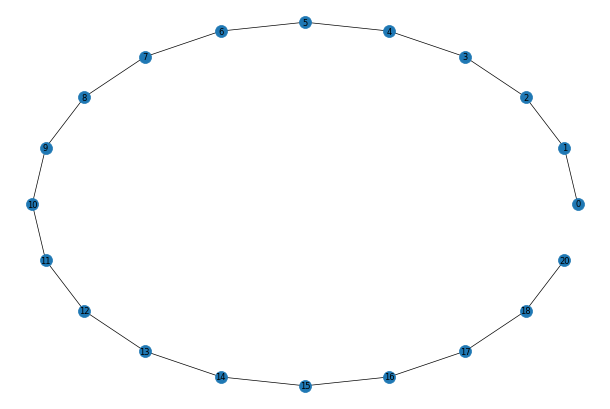

-16.3


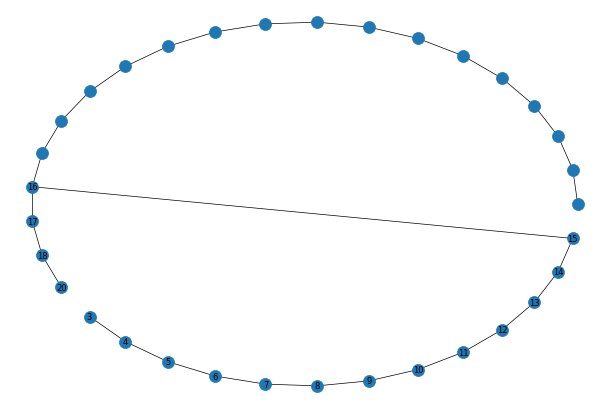

In [105]:


s1 = '........................((((((....(((((((((.(((((((.(......).)))))))...))).)).))))..))))))..........'
s2       = '...(((.........)))..((((((((((.(((((((((....(((((((.(......).)))))))...)).))))).).).))))))....))))..'
s1 = '....................((((((((((......(((((((.(((((((.(......).)))))))...))).)).))....))))))....))))..'
s1 = '....................((((((((((.........((((.(((((((.(......).)))))))...))).)........))))))....))))..'

search_width = 1

sE, path = findpath_librna.pathfinder(sequence, s1, s2, search_width=search_width, return_paths=True, return_s=True)

# print(path)

# sE, path = findpath_librna.pathfinder(sequence, s1, s2, search_width=search_width, return_paths=True)
# print_moves(sequence, s1, s2, path)

G = nx.DiGraph()

def plot_graph(G, labeldict={}, filename='', x=20, y=12):

    G = G.to_undirected()
    
    x = 12
    y = 8

    # visualization below
    # plt.figure(figsize=(12, 8), dpi=250, facecolor='w', edgecolor='k')
    plt.figure(figsize=(x, y), dpi=50, facecolor='w', edgecolor='k')
    # pos = nx.spring_layout(G, dim=2, iterations=50)
    pos = nx.draw_circular(G, labels=labeldict, with_labels = True)
    edge_labels = nx.get_edge_attributes(G, "label")
    node_labels = nx.get_node_attributes(G, "label")

    # label offset
    # pos_attrs = {}
    # for node, coords in pos.items():
    #     pos_attrs[node] = (coords[0], coords[1] - 0.07)
    # formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore

    colors = [node[1]['color'] for node in G.nodes(data=True)]
    # nx.draw(G, pos, node_color=colors)
    # nx.draw_networkx_labels(G,pos_attrs,node_labels,font_size=15,font_color='b')
    # nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_size=11, font_color='red')
    plt.show()


def path_to_graph(G, path, offset=0):

    node0 = path[0][3]
    node1 = node0

    G.add_node(node0)
    G.nodes[node0]['color'] = "g"

    labeldict = {}
    labeldict[node0] = 0+offset

    for i in range(0, len(path)-1):
        node0 = s0 = path[i][3]
        node1 = s1 = path[i+1][3]
        en = path[i+1][2]

        G.add_edge(node0, node1)
        G[node0][node1]['weight'] = en
        G.nodes[node1]['color'] = "r"

        labeldict[node0] = i+offset
        labeldict[node1] = i+1+offset

        # G.nodes[node0]['label'] = i
        # G.nodes[node1]['label'] = i+1

    labeldict[node1] = len(path)+offset
    G.nodes[node1]['color'] = "g"

    return G, labeldict


search_width = 1
s1 = '....................((((((((((......(((((((.(((((((.(......).)))))))...))).)).))....))))))....))))..'
sE, path = findpath_librna.pathfinder(sequence, s1, s2, search_width=search_width, return_paths=True, return_s=True)

print(sE)
offset = 0
G, labeldict = path_to_graph(G, path, offset)
plot_graph(G, labeldict)


s1 = '....................((((((((((.........((((.(((((((.(......).)))))))...))).)........))))))....))))..'
sE, path = findpath_librna.pathfinder(sequence, s1, s2, search_width=search_width, return_paths=True, return_s=True)

print(sE)
offset = 3
G, labeldict = path_to_graph(G, path, offset)
plot_graph(G, labeldict)




